## 导入需要用到的库

In [26]:
import numpy as np
import pandas as pd
import nibabel as nib
import pydicom
import matplotlib.pyplot as plt
from nibabel.affines import apply_affine
import os
import cv2

In [39]:
nii_path = 'D:/doctoral_program/drive/jupyter/Dataset/Visualauditory/TR645_MNIn28n96n6_FC/seed_CORR_FCmap/s1_01/TV_s1_01_FCM_01.nii'
img = nib.load(nii_path)
img_data = img.get_data()
img_data.shape

<ipython-input-39-9c5f08979a8a>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img_data = img.get_data()


(61, 73, 61)

In [61]:
filename = nii_path.split('/')[-1].split('.')[0]

In [32]:
x, y, z = img_data.shape


61

In [56]:
img_data[1,1,1]

0.0

In [121]:
#求99.9%位数
def quantile(nii_data):
    num = round(len(nii_data.reshape(-1))*(0.00035))
    threshold = sorted(nii_data.reshape(-1))[-num]
    
    return threshold, num

In [133]:
#统计数据转连接函数
def nii_to_connect(nii_path):
    iter_num = 0
    filename = nii_path.split('/')[-1].split('.')[0]
    nii = nib.load(nii_path)
    nii_data = nii.get_data()
    x_num, y_num, z_num = nii_data.shape
    threshold, num = quantile(nii_data)
    first_row = ['0']+['1']*(num)
    other_row = ['1']+['0']*(num)
    with open(filename+'_node.node', 'a') as f:
        f.writelines('\t'.join([str(-28.0),str(-96.0),str(-6.0),'4','1','a'])+'\n')
    for x in range(x_num):
        for y in range(y_num):
            for z in range(z_num):
                if nii_data[x,y,z] >= threshold and iter_num <= num :
                    a, b, c = apply_affine(img.affine, np.array((x,y,z)))
                    with open(filename+'_node.node', 'a') as f:
                        f.writelines('\t'.join([str(a),str(b),str(c),'4','1','a'])+'\n')
                    iter_num += 1


In [134]:
os.chdir('D:\doctoral_program\drive\jupyter\Dataset\Visualauditory\dynamicEC_sw\seed_GCmap\s1_01')
nii_list = os.listdir('D:\doctoral_program\drive\jupyter\Dataset\Visualauditory\dynamicEC_sw\seed_GCmap\s1_01')

In [135]:
for nii_path in nii_list:
    nii_to_connect(nii_path)

<ipython-input-133-fd8e14389e31>:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  nii_data = nii.get_data()


In [96]:
a

NameError: name 'a' is not defined

In [28]:
vox_center

array([30., 36., 30.])

(61, 73)


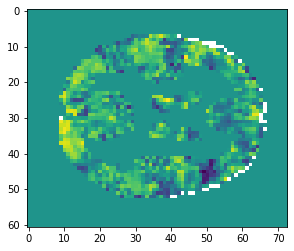

In [4]:
img_data_01 = img_data[:,:,30]
print(img_data_01.shape)
plt.imshow(img_data_01)
#存入csv文件
#np.savetxt('./connection.csv', img_data_01, delimiter=',')

In [12]:
img_data_01

memmap([0., 0., 0.], dtype=float32)

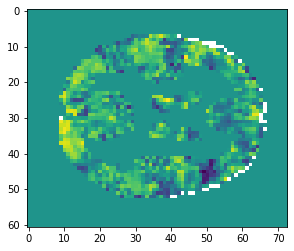